### Cab-Driver Agent

In [1]:
# Importing libraries
import numpy as np
import random
import math
from collections import deque
import collections
import pickle

# for building DQN model
from keras import layers
from keras import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

# for plotting graphs
import matplotlib.pyplot as plt

# Import the environment
import Env
import importlib 
importlib.reload(Env)

Using TensorFlow backend.


<module 'Env' from 'E:\\Jupyter Workspace\\RL - Assignment\\cabby_optimisation\\Env.py'>

#### Defining Time Matrix

In [2]:
# Loading the time matrix provided
Time_matrix = np.load("TM.npy")

#### Tracking the state-action pairs for checking convergence


In [3]:
#Defining a function to save the Q-dictionary as a pickle file
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

### Agent Class

If you are using this framework, you need to fill the following to complete the following code block:
1. State and Action Size
2. Hyperparameters
3. Create a neural-network model in function 'build_model()'
4. Define epsilon-greedy strategy in function 'get_action()'
5. Complete the function 'append_sample()'. This function appends the recent experience tuple <state, action, reward, new-state> to the memory
6. Complete the 'train_model()' function with following logic:
   - If the memory size is greater than mini-batch size, you randomly sample experiences from memory as per the mini-batch size and do the following:
      - Initialise your input and output batch for training the model
      - Calculate the target Q value for each sample: reward + gamma*max(Q(s'a,))
      - Get Q(s', a) values from the last trained model
      - Update the input batch as your encoded state and output batch as your Q-values
      - Then fit your DQN model using the updated input and output batch.

In [4]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        # Define size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # Write here: Specify you hyper parameters for the DQN
        self.discount_factor = 0.95
        self.learning_rate = 0.01        
        self.epsilon_max = 1
        self.epsilon_decay = 0.99
        self.epsilon_min = 0.01
        
        self.batch_size = 32        
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()

    # approximate Q function using Neural Network
    def build_model(self):
        model = Sequential()
        # Write your code here: Add layers to your neural nets       
        # hidden layers
        model.add(Dense(32, input_dim=self.state_size, activation='relu', kernel_initializer='he_uniform'))
        model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))

        # the output layer: output is of size num_actions
        model.add(Dense(self.action_size, activation='relu', kernel_initializer='he_uniform'))
        
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        model.summary
        return model



    def get_action(self, state):
    # Write your code here:
    # get action from model using epsilon-greedy policy
    # Decay in ε after we generate each sample from the environment       
        if np.random.rand() <= self.epsilon_max:
            # explore: choose a random action from all possible actions
            # in case of cartpole this will randomly choose an action between 0 and 1
            return random.choice(env.requests(state)[1])
        else:
            # choose the action with the highest q(s, a)
            # the first index corresponds to the batch size, so
            # reshape state to (1, state_size) so that the first index corresponds to the batch size
            #state = (env.state_encod_arch1(state)).reshape(1, self.state_size)
            state = np.array(env.state_encod_arch1(state)).reshape(1, 36)
            q_value = self.model.predict(state)
            return env.action_space[np.argmax(q_value)]

        
        
        


    def append_sample(self, state, action, reward, next_state):
    # Write your code here:
    # save sample <s,a,r,s'> to the replay memory
        self.memory.append((state, action, reward, next_state))
    
    
    # pick samples randomly from replay memory (with batch_size) and train the network
    def train_model(self):
        
        if len(self.memory) > self.batch_size:
            # Sample batch from the memory
            mini_batch = random.sample(self.memory, self.batch_size)
            update_output = np.zeros((self.batch_size, 36))# write here
            update_input = np.zeros((self.batch_size, 36))# write here
            
            actions, rewards = [], []
            
            for i in range(self.batch_size):
                state, action, reward, next_state = mini_batch[i]
                update_input[i] = env.state_encod_arch1(state)
                actions.append(action)
                rewards.append(reward)
                update_output[i] = env.state_encod_arch1(next_state)
                
                # Write your code from here
                # 1. Predict the target from earlier model
            target = self.model.predict(update_input)
                
                # 2. Get the target for the Q-network
            target_qval = self.model.predict(update_output)
            
            
                #3. Update your 'update_output' and 'update_input' batch
            for i in range(self.batch_size):
                target[i][env.action_space.index(action)] = rewards[i] + self.discount_factor * np.max(target_qval[i])
                #print(target[i][env.action_space.index(action)])
        # 4. Fit your model and track the loss values
            self.model.fit(update_input, target, batch_size=self.batch_size, epochs=1, verbose=0)

    def save(self, name):
        self.model.save(name)

In [5]:
Episodes = 20000

In [6]:
env = Env.CabDriver()

state_size = 36# equal to 4 in case of cartpole 
action_size = len(env.action_space) 

print(action_size)

21


### DQN block

In [7]:
rewards_per_episode = []
episodes = []
agent = DQNAgent(state_size, action_size)

for episode in range(Episodes):

    # Write code here
    # Call the environment
    # Call all the initialised variables of the environment
    terminal_state = False
    state = [0,0,0]
    time = 0
    score = 0

    #Call the DQN agent
    
    if (episode % 500 == 0):
        print("Episode {}".format(episode))
    
    while time < 300:
        
        # Write your code here
        # 1. Pick epsilon-greedy action from possible actions for the current state
        # 2. Evaluate your reward and next state
        # 3. Append the experience to the memory
        # 4. Train the model by calling function agent.train_model
        # 5. Keep a track of rewards, Q-values, loss
        
        
 
        action = agent.get_action(state)
        reward, next_state, trip_time = env.step(state, action, Time_matrix)
        time = time + trip_time
        agent.append_sample(state, action, reward, next_state)
        
        agent.train_model()
        
        score += reward
        state = next_state
        
    rewards_per_episode.append(score)
    episodes.append(episode)
    
    if agent.epsilon_max > agent.epsilon_min:
        agent.epsilon_max *= agent.epsilon_decay
    
    

Episode 0
Episode 500
Episode 1000
Episode 1500
Episode 2000
Episode 2500
Episode 3000
Episode 3500
Episode 4000
Episode 4500
Episode 5000
Episode 5500
Episode 6000
Episode 6500
Episode 7000
Episode 7500
Episode 8000
Episode 8500
Episode 9000
Episode 9500
Episode 10000
Episode 10500
Episode 11000
Episode 11500
Episode 12000
Episode 12500
Episode 13000
Episode 13500
Episode 14000
Episode 14500
Episode 15000
Episode 15500
Episode 16000
Episode 16500
Episode 17000
Episode 17500
Episode 18000
Episode 18500
Episode 19000
Episode 19500


In [8]:
print(rewards_per_episode)

[-107.0, 37.0, -314.0, -163.0, -232.0, -82.0, 37.0, -28.0, -238.0, -385.0, -195.0, 126.0, -300.0, 175.0, 24.0, 54.0, -158.0, 28.0, -298.0, -23.0, -207.0, 6.0, 178.0, -144.0, 32.0, -6.0, -254.0, 23.0, 48.0, -266.0, -194.0, -174.0, -254.0, -174.0, -45.0, -68.0, 35.0, -205.0, -141.0, -166.0, -156.0, -76.0, -14.0, -75.0, 157.0, -75.0, 222.0, -152.0, -229.0, -242.0, -157.0, -14.0, -58.0, 5.0, -163.0, 167.0, -201.0, 105.0, -75.0, -25.0, 118.0, -131.0, -29.0, 40.0, -265.0, -59.0, -134.0, -189.0, -238.0, 1.0, 4.0, -112.0, -269.0, 45.0, -209.0, -98.0, -67.0, -84.0, -335.0, -189.0, -120.0, -77.0, -76.0, -236.0, -270.0, -104.0, -122.0, -93.0, -109.0, -35.0, -102.0, 175.0, 79.0, -15.0, -171.0, -57.0, -127.0, -27.0, 101.0, -141.0, -468.0, -107.0, 55.0, 9.0, -381.0, -220.0, -146.0, -137.0, -289.0, -47.0, -86.0, -201.0, 65.0, 11.0, -291.0, -78.0, -271.0, -137.0, -34.0, -109.0, -177.0, -194.0, 19.0, -35.0, -187.0, -100.0, -114.0, -71.0, -235.0, -66.0, -275.0, -171.0, -158.0, -143.0, -115.0, 40.0, -215

In [9]:
print(agent.memory)

deque([([2, 5, 3], (3, 2), -5.0, [2, 15, 3]), ([2, 15, 3], (3, 2), -30.0, [2, 21, 3]), ([2, 21, 3], (3, 2), 0.0, [2, 21, 3]), ([2, 21, 3], (3, 2), 0.0, [2, 21, 3]), ([2, 21, 3], (3, 2), 0.0, [2, 21, 3]), ([2, 21, 3], (3, 2), 0.0, [2, 21, 3]), ([2, 21, 3], (3, 2), 0.0, [2, 21, 3]), ([2, 21, 3], (3, 2), 0.0, [2, 21, 3]), ([2, 21, 3], (3, 2), 0.0, [2, 21, 3]), ([2, 21, 3], (3, 2), 0.0, [2, 21, 3]), ([2, 21, 3], (3, 2), 0.0, [2, 21, 3]), ([2, 21, 3], (0, 3), 3.0, [3, 9, 4]), ([3, 9, 4], (0, 3), -1.0, [3, 11, 4]), ([3, 11, 4], (0, 3), 7.0, [3, 15, 4]), ([3, 15, 4], (0, 3), -11.0, [3, 19, 4]), ([3, 19, 4], (0, 3), -1.0, [3, 21, 4]), ([3, 21, 4], (0, 3), -1.0, [3, 23, 4]), ([3, 23, 4], (0, 3), 11.0, [3, 4, 5]), ([3, 4, 5], (0, 3), 4.0, [3, 14, 5]), ([3, 14, 5], (0, 3), -8.0, [3, 21, 5]), ([3, 21, 5], (0, 3), 9.0, [3, 6, 6]), ([3, 6, 6], (0, 3), -3.0, [3, 12, 6]), ([3, 12, 6], (0, 3), 0.0, [3, 12, 6]), ([3, 12, 6], (0, 3), 0.0, [3, 12, 6]), ([3, 12, 6], (0, 3), 0.0, [3, 12, 6]), ([3, 12, 6], (

### Tracking Convergence

#### Epsilon-decay sample function

<div class="alert alert-block alert-info">
Try building a similar epsilon-decay function for your model.
</div>

In [10]:
time = np.arange(0,10000)
epsilon = []
for i in range(0,10000):
    epsilon.append(0 + (1 - 0) * np.exp(-0.0009*i))

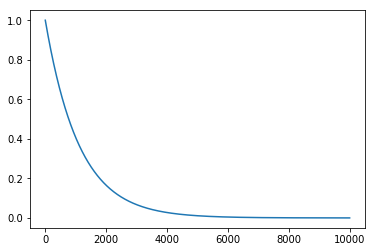

In [11]:
plt.plot(time, epsilon)
plt.show()

In [12]:
model = agent.build_model()

##### 

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                1184      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 21)                693       
Total params: 2,933
Trainable params: 2,933
Non-trainable params: 0
_________________________________________________________________
